https://www.markdownguide.org/cheat-sheet/

# Testarea Automată a Circuitelor
        --- Îndrumar de Laborator ---

### Lucrarea nr. 2 - Caracteristica diodei

#### 2.1.1 Montajul experimental:
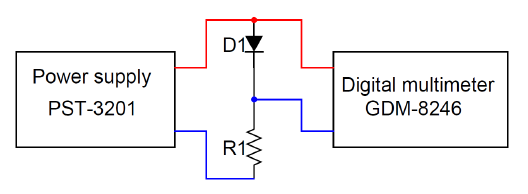

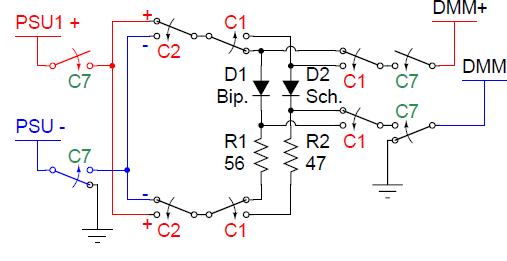

#### 2.1.2 Procedura de masurare:
In circuit sunt prezente doua diode, D1 (bipolara) si D2 (Schotky).
Prin actionearea lui C7 canalul 1 al sursei de tensiune este conectat la intrarea circuitului,
iar multimetrul la iesirea acestuia (in paralel cu dioda).
C1 – selecteaza D1 (OFF) sau D2 (ON)
C2 – inverseaza polaritatea sursei.

Multimetrul măsoară căderea de tensiune pe diodă. Curentul poate fi măsurat indirect,
folosind următoarea formulă (Vpsu reprezintă tensiunea de ieșire a sursei de alimentare):
𝐼𝐷 = (𝑉𝑃𝑆𝑈 − 𝑉𝐷) / 𝑅1

Functii auxiliare: findfirst (ex: idx = findfirst([11,66,39] .== 66))

#### 2.2 Codul sursa:
2.2.1 Initializarea instrumentelor si a interfetelor grafice

In [ ]:
#using TIVM; # libraria responsabila de comunicatia cu instrumentele si cu interfetele grafice(front panels)
#using Plots; # libraria responsabila de generarea de grafice
#using DataFrames; #
#using CSV; # libraria responsabila de salvarea datelor in format .csv

In [1]:
dmm_handle = connect!("ASRL1::INSTR")
psu_handle = connect!("ASRL4::INSTR")
#fgen = connect!("ASRL4::INSTR")
#scope = connect!("USB0::0x0699::0x0364::C057729::INSTR")
dmm = TIVM.GDM8246(dmm_handle);
psu = TIVM.PST3201(psu_handle);

In [2]:
# Panouri frontale pentru instrumente
#@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle, fgen_handle = fgen_handle, scope_handle = scope_handle)
@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle);

2.2.2 Connfigurarea instrumentelor

In [3]:
# Sursa de tensiune
# C1
set_source_lev(psu, "C1", 0)
set_volt_protection(psu, "C1", 20)
set_max_curr(psu, "C1", 0.5)
# C2
set_source_lev(psu, "C2", 0)
set_volt_protection(psu, "C2", 20)
set_max_curr(psu, "C2", 0.5)
# C3
set_source_lev(psu, "C3", 0)
set_volt_protection(psu, "C3", 20)
set_max_curr(psu, "C3", 0.5)
# Output on
set_outp(psu, "C1", "on") # PST3201 nu poate porni/opri canale individual

# Multimetrul GDM8246
set_sense_func(dmm, "C1", "DCV") # alte functii: ACV, AC+DCV, RIPPLE, OHM
#set_sense_range_auto(dmm, "C1", "on") # autorange
set_sense_range(dmm, "C1", 10) # 10V range

2.2.3 Definirea stimulilor si a variabilelor auxiliare

In [4]:
R1 = 47
volt_step = 0.2
vthdioda = 0
volt_range = volt_step:volt_step:3.0
diode_volt = []
diode_crt = []

Any[]

2.2.4 Bucla de masurare

In [5]:
diode_volt = []
diode_crt = []
I1=0
I2=0
V1=0
V2=0
for crt_volt in volt_range
    # setare tensiune psu
    set_source_lev(psu, "C1", crt_volt)
    sleep(1) # sursa de tensiune si multimetrul raspund lent la comenzi
    # masurare tensiune cu dmm
    volt_meas = get_primary_measurement(dmm, "C1")
    # calcul curent pe baza formulei
    crt_meas = (crt_volt - volt_meas)/R1
    # adaugarea masuratorilor in vectorii de rezultate
    push!(diode_volt, volt_meas)
    push!(diode_crt, crt_meas)
    #print console
    @info "VD=" volt_meas
    @info "ID=" crt_meas
end

┌ Info: VD=
│   volt_meas = 0.191
└ @ Main In[5]:19
┌ Info: ID=
│   crt_meas = 0.00019148936170212784
└ @ Main In[5]:20
┌ Info: VD=
│   volt_meas = 0.313
└ @ Main In[5]:19
┌ Info: ID=
│   crt_meas = 0.0018510638297872346
└ @ Main In[5]:20
┌ Info: VD=
│   volt_meas = 0.353
└ @ Main In[5]:19
┌ Info: ID=
│   crt_meas = 0.00525531914893617
└ @ Main In[5]:20
┌ Info: VD=
│   volt_meas = 0.374
└ @ Main In[5]:19
┌ Info: ID=
│   crt_meas = 0.009063829787234044
└ @ Main In[5]:20
┌ Info: VD=
│   volt_meas = 0.388
└ @ Main In[5]:19
┌ Info: ID=
│   crt_meas = 0.013021276595744681
└ @ Main In[5]:20
┌ Info: VD=
│   volt_meas = 0.399
└ @ Main In[5]:19
┌ Info: ID=
│   crt_meas = 0.01704255319148936
└ @ Main In[5]:20
┌ Info: VD=
│   volt_meas = 0.407
└ @ Main In[5]:19
┌ Info: ID=
│   crt_meas = 0.021127659574468084
└ @ Main In[5]:20
┌ Info: VD=
│   volt_meas = 0.415
└ @ Main In[5]:19
┌ Info: ID=
│   crt_meas = 0.02521276595744681
└ @ Main In[5]:20
┌ Info: VD=
│   volt_meas = 0.422
└ @ Main In[5]:19
┌ In

2.3.3 Tensiunea de prag a diodei

2.3.4 Rezistenta serie a diodei

2.2.5 Oprirea instrumentelor

In [6]:
set_outp(psu, "C1", "off") # PST3201 nu poate porni/opri canale individual

2.2.6 Generarea caracteristicii Curent-Tensiune a diodei, dupa incheierea masuratorilor

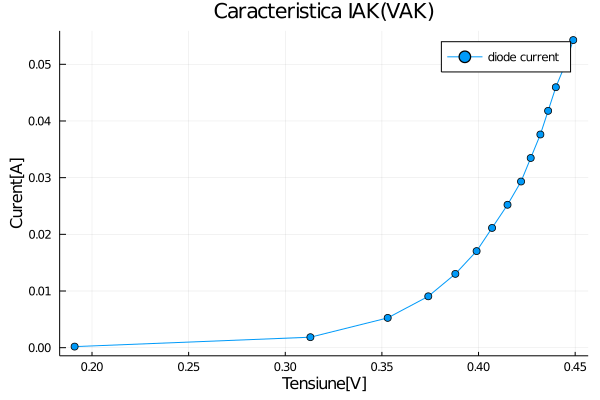

In [7]:
h=plot(diode_volt, diode_crt; markershape=:circle, label="diode current");
title!("Caracteristica IAK(VAK)");
xlabel!("Tensiune[V]");
ylabel!("Curent[A]");
display(h)

2.2.7 Salvarea datelor in fisierul .csv

In [10]:
df = DataFrame("Dioda" =>"D1","Voltage [V]" => diode_volt, "Current [A]" => diode_crt)
CSV.write("02_dioda_new.csv", df; append=false)
#CSV.write("dioda.csv", (diode_volt = diode_volt, diode_crt = diode_crt); header = ["Voltage [V]", "Current [A]"])

"02_dioda_0.csv"

2.2.8 Deconectarea instrumentelor

In [ ]:
disconnect!(dmm_handle)
disconnect!(psu_handle)

#### 2.3 Desfasurarea lucrarii:

In [ ]:
1. Modificati codul pentru a obtine precizie mai mare a masuratorilor
2. Modificați pasul sursei de tensiune de la 50mV la 100mV.
3. Afisati tensiunea de prag a diodei
Indicație: Putem defini pragul diodei ca tensiunea obținută la curentul de 5(10) mA
a. Cu functia if:
vthdioda = 0
if crt_meas < 5e-3
    vthdioda = volt_meas
    @info "prag" volt_meas
    else @info "prag done"
end

b. Prin cautare in vectorul de date:
crt_thr = 5e-3
idx = findfirst(diode_crt .&gt;= crt_thr)
v_thr = diode_volt[idx]

@info "prag=" vthdioda
4. Determinati rezistenta serie a diodei.
Indicație: Se poate considera că începand cu tensiunea de 0.5V caracteristica diodei este
influenţată preponderent de rezistenţa serie. Calculul rezistenţei serie se reduce la raportul
dintre variaţia tensiunii şi cea a curentului în două puncte (spre exemplu, 0.5V şi 0.55V).

a. Cu functia IF
    if volt_meas < 0.5
        V1=volt_meas
        I1=crt_meas
    else
    end

     if volt_meas < 0.55
        V2=volt_meas
        I2=crt_meas
    else
    end

@info "V1=" V1
@info "V2=" V2
@info "I1=" I1
@info "I2=" I2
Res=0
Res=(V2-V1)/(I2-I1)
@info "Res=" Res

    
b. Prin cautare in vectorul de date
idx1 = findfirst(diode_volt .>= 0.51)
idx2 = findfirst(diode_volt .>= 0.54)
Rs = (diode_volt[idx2] - diode_volt[idx1])/(diode_crt[idx2] - diode_crt[idx1])

5. Masurati ambele diode. Introduceti datele in acelasi fisier CSV
Indicatie: 
df = DataFrame("Dioda" =>"D1","Voltage [V]" => diode_volt, "Current [A]" => diode_crt)
CSV.write("01_dioda_new.csv", df)
Df1 = DataFrame("Dioda" =>"D2","Voltage [V]" => diode_volt1, "Current [A]" => diode_crt1)
CSV.write("02_dioda_new.csv ", df1, append = true)
6. Modificați codul pentru a înlocui variabila "crt_volt" (tensiunea de la ieșirea sursei de alimentare) cu tensiunea măsurată de sursa de alimentare.
7. Modificați codul pentru a înlocui măsurătoarea indirectă de curent cu curentul măsurat de sursa de alimentare.
8. Opriți execuția programului la depășirea curentului de 10mA.

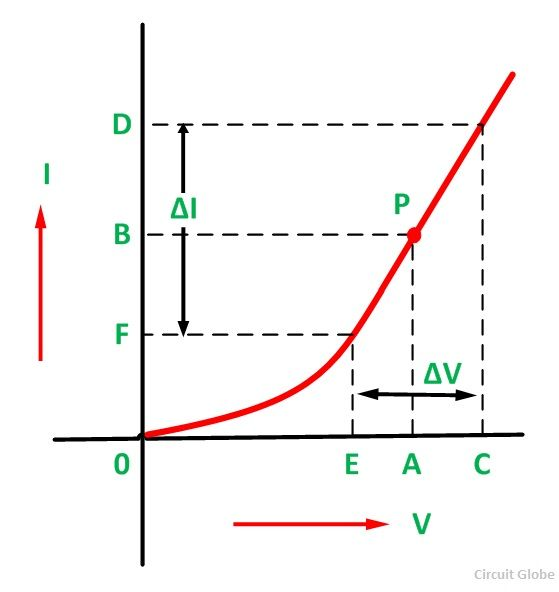